In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud

%matplotlib inline

In [2]:
resenha = pd.read_csv('../dados/imdb-reviews-pt-br.csv')
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
classificacao = resenha['sentiment'].replace(['neg', 'pos'], [0,1])
resenha['classificacao'] = classificacao
resenha

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [4]:


def classificar_texto(texto, coluna_texto, coluna_classificacao):
    
    vetorizador = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizador.fit_transform(texto[coluna_texto])
    bag_of_words.shape

    treino_x, teste_x, treino_y, teste_y = train_test_split(bag_of_words,
                                                           resenha[coluna_classificacao],
                                                           random_state = 42)

    regressao_logistica = LogisticRegression(random_state=42)
    regressao_logistica.fit(treino_x, treino_y)
    return regressao_logistica.score(teste_x, teste_y)

print(classificar_texto(resenha, "text_pt", "classificacao"))

0.6583097452486858


In [5]:
def wordcloud_neg(resenhas, coluna_texto) :   
    resenhas_negativas = resenhas.query("sentiment == 'neg'")

    todas_palavras = ' '.join([texto for texto in resenhas_negativas[coluna_texto]])

    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110,
                               collocations=False).generate(todas_palavras)

    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show

In [6]:
def wordcloud_pos(resenhas, coluna_texto) :   
    resenhas_positivas = resenhas.query("sentiment == 'pos'")

    todas_palavras = ' '.join([texto for texto in resenhas_positivas[coluna_texto]])

    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110,
                               collocations=False).generate(todas_palavras)

    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show

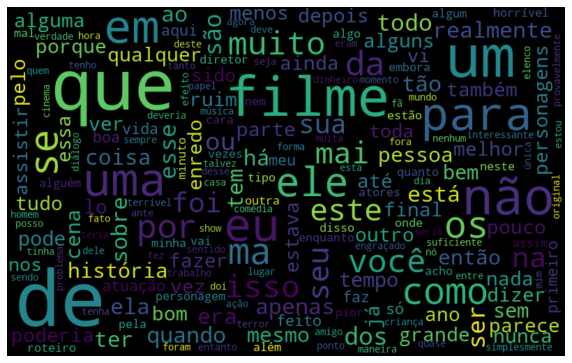

In [7]:
wordcloud_neg(resenha, "text_pt")



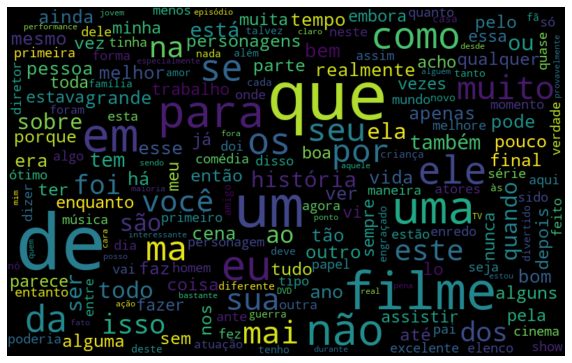

In [8]:
wordcloud_pos(resenha, "text_pt")

In [10]:
frase=['um filme ruim', 'um filme bom']
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme ruim': 1, 'um filme bom': 1})